In [1]:
import mlflow
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
mlflow.set_tracking_uri("http://localhost:5000")
# enable autologging
mlflow.sklearn.autolog()

# Poner en la consola de python (mismo entorno)
# mlflow backend-stserver --bore-uri=sqlite:///D:\MLFLOW\ExersiceDatabase.db --default-artifact-root=file:D:\MLFLOW\mlruns  

In [3]:
X , y = datasets.load_wine(return_X_y=True,as_frame=True)

In [4]:
standarizer = preprocessing.StandardScaler().fit(X)
X_std = standarizer.transform(X)

In [8]:

X_std = pd.DataFrame(X_std)
X_std.columns = X.columns

X_std_train, X_std_test, y_train, y_test = train_test_split(X_std,y,train_size=0.7,random_state=42)

2022/08/03 23:15:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '275faa57764a4187ae731992d8e0e384', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


0.8518518518518519


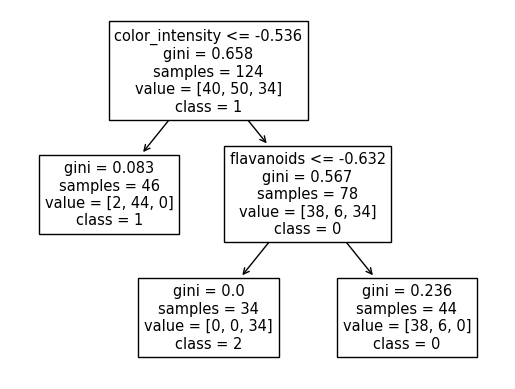

In [9]:
from sklearn import tree

obj_clasificador = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=30)

obj_clasificador = obj_clasificador.fit(X_std_train, y_train)

tree.plot_tree(obj_clasificador,feature_names=X_std.columns,class_names=('0','1','2'))

obj_clasificador.score(X_std_test,y_test)
print(obj_clasificador.score(X_std_test,y_test))

In [12]:
logged_model = 'runs:/a478ae7533b54f00a3dd74d05f0b2cce/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_std_test))



array([0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 0, 0, 0, 2])

In [13]:
obj_clasificador.predict(X_std_test)

array([0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 0, 0, 0, 2])